# beatMapGenerator

## Import

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import time
import csv

notes = [
    ('C1', 33), ('C#1', 35), ('D1', 37), ('D#1', 39), ('E1', 41), ('F1', 44), ('F#1', 46), ('G1', 49), ('G#1', 52), ('A1', 55), ('A#1', 58), ('B1', 62),
    ('C2', 65), ('C#2', 69), ('D2', 73), ('D#2', 78), ('E2', 82), ('F2', 87), ('F#2', 92), ('G2', 98), ('G#2', 104), ('A2', 110), ('A#2', 117), ('B2', 123),
    ('C3', 131), ('C#3', 139), ('D3', 147), ('D#3', 156), ('E3', 165), ('F3', 175), ('F#3', 185), ('G3', 196), ('G#3', 208), ('A3', 220), ('A#3', 233), ('B3', 247),
    ('C4', 262), ('C#4', 277), ('D4', 294), ('D#4', 311), ('E4', 330), ('F4', 349), ('F#4', 370), ('G4', 392), ('G#4', 415), ('A4', 440), ('A#4', 466), ('B4', 494),
    ('C5', 523), ('C#5', 554), ('D5', 587), ('D#5', 622), ('E5', 659), ('F5', 698), ('F#5', 740), ('G5', 784), ('G#5', 831), ('A5', 880), ('A#5', 932), ('B5', 988),
    ('C6', 1047), ('C#6', 1109), ('D6', 1175), ('D#6', 1245), ('E6', 1319), ('F6', 1397), ('F#6', 1480), ('G6', 1568), ('G#6', 1661), ('A6', 1760), ('A#6', 1865), ('B6', 1976),
    ('C7', 2093), ('C#7', 2217), ('D7', 2349), ('D#7', 2489), ('E7', 2637), ('F7', 2794), ('F#7', 2960), ('G7', 3136), ('G#7', 3322), ('A7', 3520), ('A#7', 3729), ('B7', 3951),
    ('C8', 4186), ('C#8', 4435), ('D8', 4699), ('D#8', 4978), ('E8', 5274), ('F8', 5588), ('F#8', 5920), ('G8', 6272), ('G#8', 6645), ('A8', 7040), ('A#8', 7459), ('B8', 7902)
]

notes = [
    ('C1', 33), ('D1', 37), ('E1', 41), ('F1', 44), ('G1', 49), ('A1', 55), ('B1', 62),
    ('C2', 65), ('D2', 73), ('E2', 82), ('F2', 87), ('G2', 98), ('A2', 110), ('B2', 123),
    ('C3', 131), ('D3', 147), ('E3', 165), ('F3', 175), ('G3', 196), ('A3', 220), ('B3', 247),
    ('C4', 262), ('D4', 294), ('E4', 330), ('F4', 349), ('G4', 392), ('A4', 440), ('B4', 494),
    ('C5', 523), ('D5', 587), ('E5', 659), ('F5', 698), ('G5', 784), ('A5', 880), ('B5', 988),
    ('C6', 1047), ('D6', 1175), ('E6', 1319), ('F6', 1397), ('G6', 1568), ('A6', 1760), ('B6', 1976),
    ('C7', 2093), ('D7', 2349), ('E7', 2637), ('F7', 2794), ('G7', 3136), ('A7', 3520), ('B7', 3951),
    ('C8', 4186), ('D8', 4699), ('E8', 5274), ('F8', 5588), ('G8', 6272), ('A8', 7040), ('B8', 7902)
]


note_to_freq = {note: freq for note, freq in notes}

## Main

Average lower bound frequency: 449.62 Hz
Average upper bound frequency: 1423.02 Hz
Average spectral bandwidth: 973.41 Hz
Detected onset length:  126


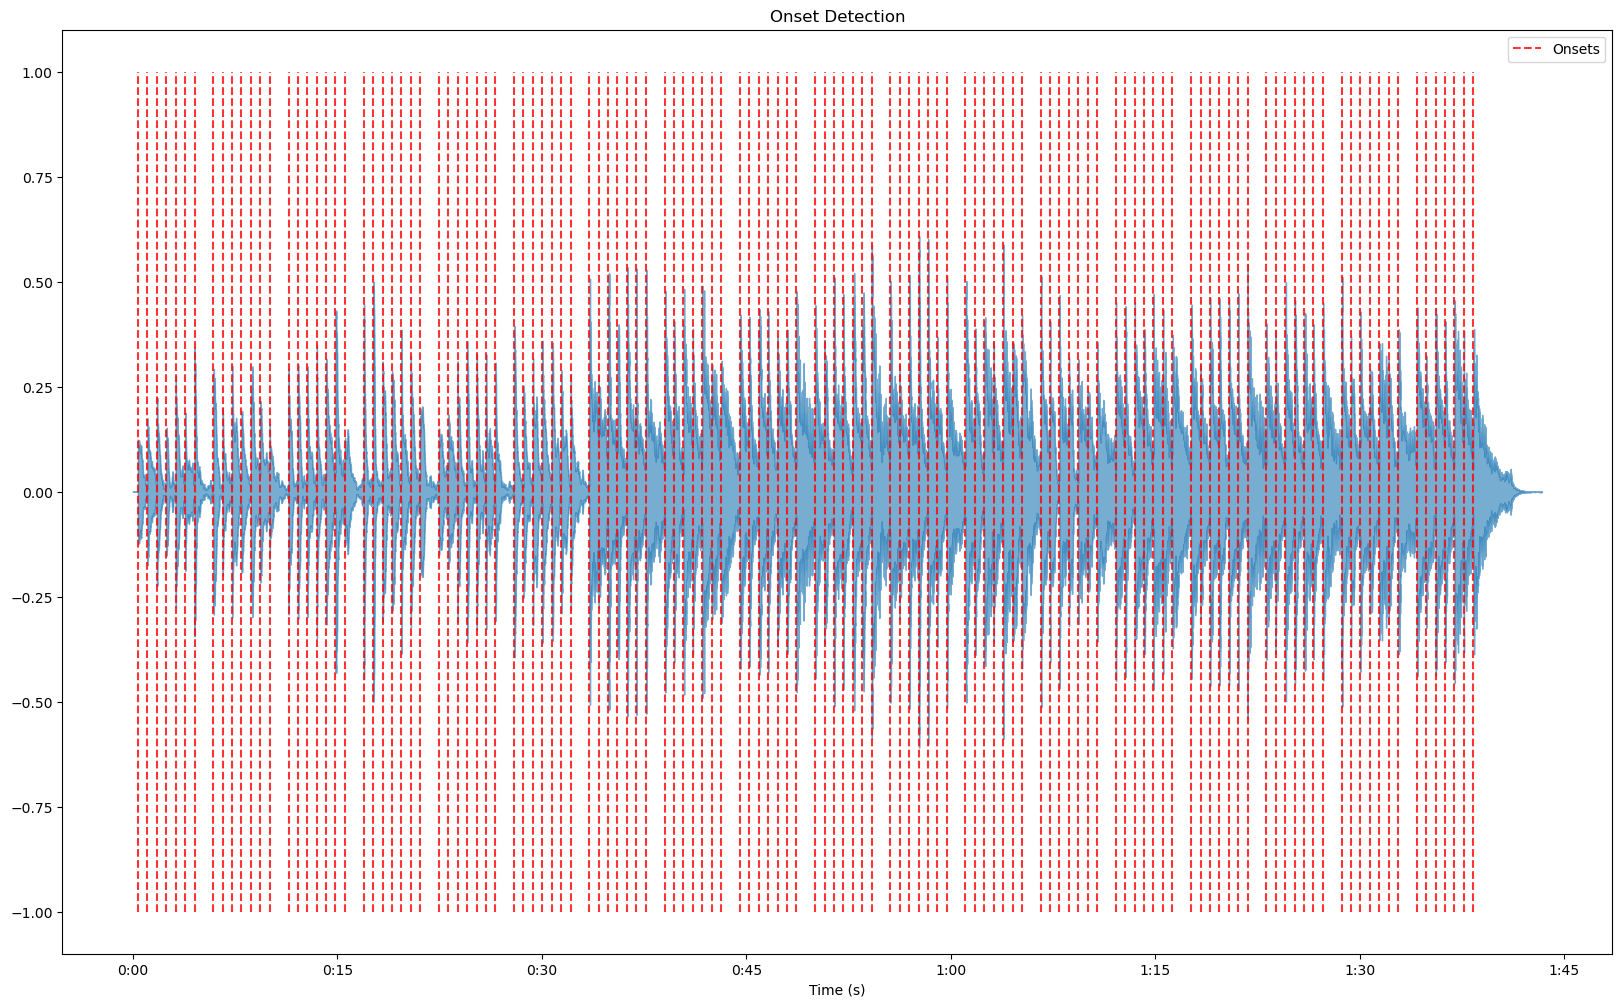

Generated keys:
Time: 0.3715s, Frequency: 527.56 Hz, Note: C5, Button: 3
Time: 1.0681s, Frequency: 516.80 Hz, Note: C5, Button: 3
Time: 1.7647s, Frequency: 785.96 Hz, Note: G5, Button: 7
Time: 2.4613s, Frequency: 785.96 Hz, Note: G5, Button: 7
Time: 3.1347s, Frequency: 882.86 Hz, Note: A5, Button: 1
Time: 3.8313s, Frequency: 882.86 Hz, Note: A5, Button: 1
Time: 4.5279s, Frequency: 785.96 Hz, Note: G5, Button: 7
Time: 5.8979s, Frequency: 699.83 Hz, Note: F5, Button: 6
Time: 6.5945s, Frequency: 699.83 Hz, Note: F5, Button: 6
Time: 7.2678s, Frequency: 678.30 Hz, Note: E5, Button: 5
Time: 7.9644s, Frequency: 656.76 Hz, Note: E5, Button: 5
Time: 8.6610s, Frequency: 592.16 Hz, Note: D5, Button: 4
Time: 9.3344s, Frequency: 592.16 Hz, Note: D5, Button: 4
Time: 10.0310s, Frequency: 592.16 Hz, Note: D5, Button: 4
Time: 11.4242s, Frequency: 796.73 Hz, Note: G5, Button: 7
Time: 12.0976s, Frequency: 785.96 Hz, Note: G5, Button: 7
Time: 12.7942s, Frequency: 699.83 Hz, Note: F5, Button: 6
Time: 13.49

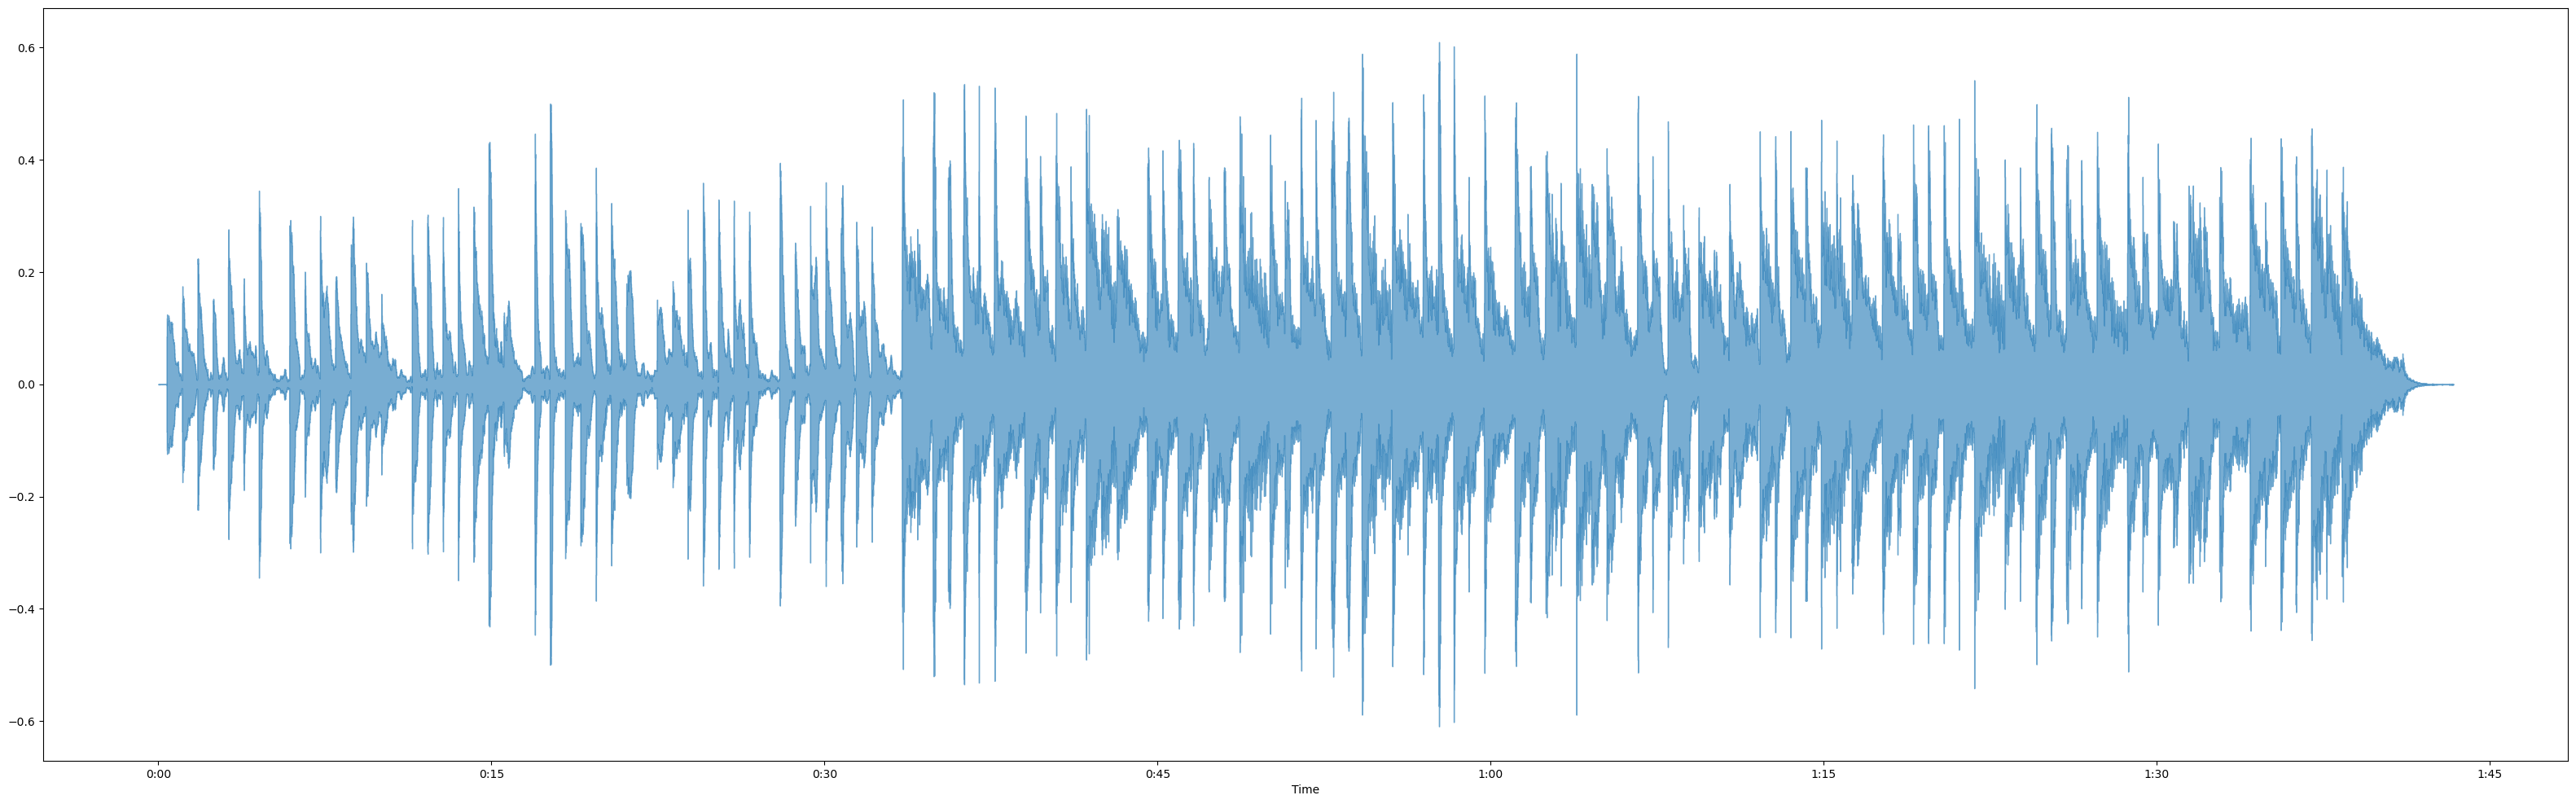

In [2]:
audio_name = 'star'
audio_path = audio_name +'.mp3'
y, sr = librosa.load(audio_path)

S = np.abs(librosa.stft(y))
frequencies = librosa.fft_frequencies(sr=sr)

bandwidth = librosa.feature.spectral_bandwidth(S=S, sr=sr)
times = librosa.times_like(bandwidth, sr=sr)
spectral_centroid = librosa.feature.spectral_centroid(S=S, sr=sr)
lower_bound = spectral_centroid - bandwidth / 2
upper_bound = spectral_centroid + bandwidth / 2
average_lower_bound = np.mean(lower_bound)
average_upper_bound = np.mean(upper_bound)
average_bandwidth = np.mean(bandwidth)
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
onsets = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr, backtrack=True, units='time', hop_length=512)


#remove onsets that are too close
min_interval = 0.1  # in seconds

filtered_onsets = [onsets[0]]
for onset in onsets[1:]:
    if onset - filtered_onsets[-1] >= min_interval:
        filtered_onsets.append(onset)


onset_spectra = []
dominant_frequencies = []

for onset in filtered_onsets:
    onset_frame = librosa.time_to_frames(onset, sr=sr)
    spectrum = np.abs(S[:, onset_frame])
    onset_spectra.append(spectrum)

    dominant_freq_index = np.argmax(spectrum)
    dominant_frequency = frequencies[dominant_freq_index]
    dominant_frequencies.append(dominant_frequency) 

def find_closest_note(freq, notes_freq):
    return min(notes_freq, key=lambda x: abs(x[1] - freq))

keys = []
for onset, dom_freq in zip(filtered_onsets, dominant_frequencies):
    closest_note, closest_freq = find_closest_note(dom_freq, notes)
    key = {'time': onset, 'frequency': dom_freq, 'note': closest_note, 'button': ord(closest_note[0]) - ord('A') + 1}
    keys.append(key)
    
print(f'Average lower bound frequency: {average_lower_bound:.2f} Hz')
print(f'Average upper bound frequency: {average_upper_bound:.2f} Hz')
print(f'Average spectral bandwidth: {average_bandwidth:.2f} Hz')
print("Detected onset length: ", len(onsets))
plt.figure(figsize=(20, 12))

librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(filtered_onsets, -1, 1, color='r', alpha=0.8, linestyle='--', label='Onsets')
plt.title('Onset Detection')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

plt.figure(figsize=(40, 12))
librosa.display.waveshow(y, sr=sr, alpha=0.6)

print("Generated keys:")
for key in keys:
    print(f"Time: {key['time']:.4f}s, Frequency: {key['frequency']:.2f} Hz, Note: {key['note']}, Button: {key['button']}")


## Post-Process

In [14]:
output_file = audio_name +'_keys.csv'

with open(output_file, 'w', newline='') as csvfile:
    fieldnames = ['time', 'button']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for key in keys:
        writer.writerow({'time': f"{key['time']:.3f}", 'button': key['button']})

## Make Sound

In [50]:
def get_frequency(note):
    return note_to_freq.get(note, "Note not found")

def generate_tone(frequency, duration, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = 0.5 * np.sin(2 * np.pi * frequency * t)
    return wave

def play_tone(frequency, duration, sample_rate=44100):
    tone = generate_tone(frequency, duration, sample_rate)
    sd.play(tone, sample_rate)
    sd.wait()

for key in keys:
    print(f"Time: {key['time']:.4f}s, Frequency: {key['frequency']:.2f} Hz, Note: {key['note']}, Button: {key['button']}")
    play_tone(get_frequency(key['note']), 0.2)
    time.sleep(0.5)

Time: 0.3715s, Frequency: 527.56 Hz, Note: C5, Button: 3
Time: 1.0681s, Frequency: 516.80 Hz, Note: C5, Button: 3
Time: 1.7647s, Frequency: 785.96 Hz, Note: G5, Button: 7
Time: 2.4613s, Frequency: 785.96 Hz, Note: G5, Button: 7
Time: 3.1347s, Frequency: 882.86 Hz, Note: A5, Button: 1
Time: 3.8313s, Frequency: 882.86 Hz, Note: A5, Button: 1
Time: 4.5279s, Frequency: 785.96 Hz, Note: G5, Button: 7
Time: 5.8979s, Frequency: 699.83 Hz, Note: F5, Button: 6
Time: 6.5945s, Frequency: 699.83 Hz, Note: F5, Button: 6
Time: 7.2678s, Frequency: 678.30 Hz, Note: E5, Button: 5
Time: 7.9644s, Frequency: 656.76 Hz, Note: E5, Button: 5
Time: 8.6610s, Frequency: 592.16 Hz, Note: D5, Button: 4
Time: 9.3344s, Frequency: 592.16 Hz, Note: D5, Button: 4
Time: 10.0310s, Frequency: 592.16 Hz, Note: D5, Button: 4
Time: 11.4242s, Frequency: 796.73 Hz, Note: G5, Button: 7
Time: 12.0976s, Frequency: 785.96 Hz, Note: G5, Button: 7
Time: 12.7942s, Frequency: 699.83 Hz, Note: F5, Button: 6
Time: 13.4908s, Frequency: 

KeyboardInterrupt: 

## Bandwidth


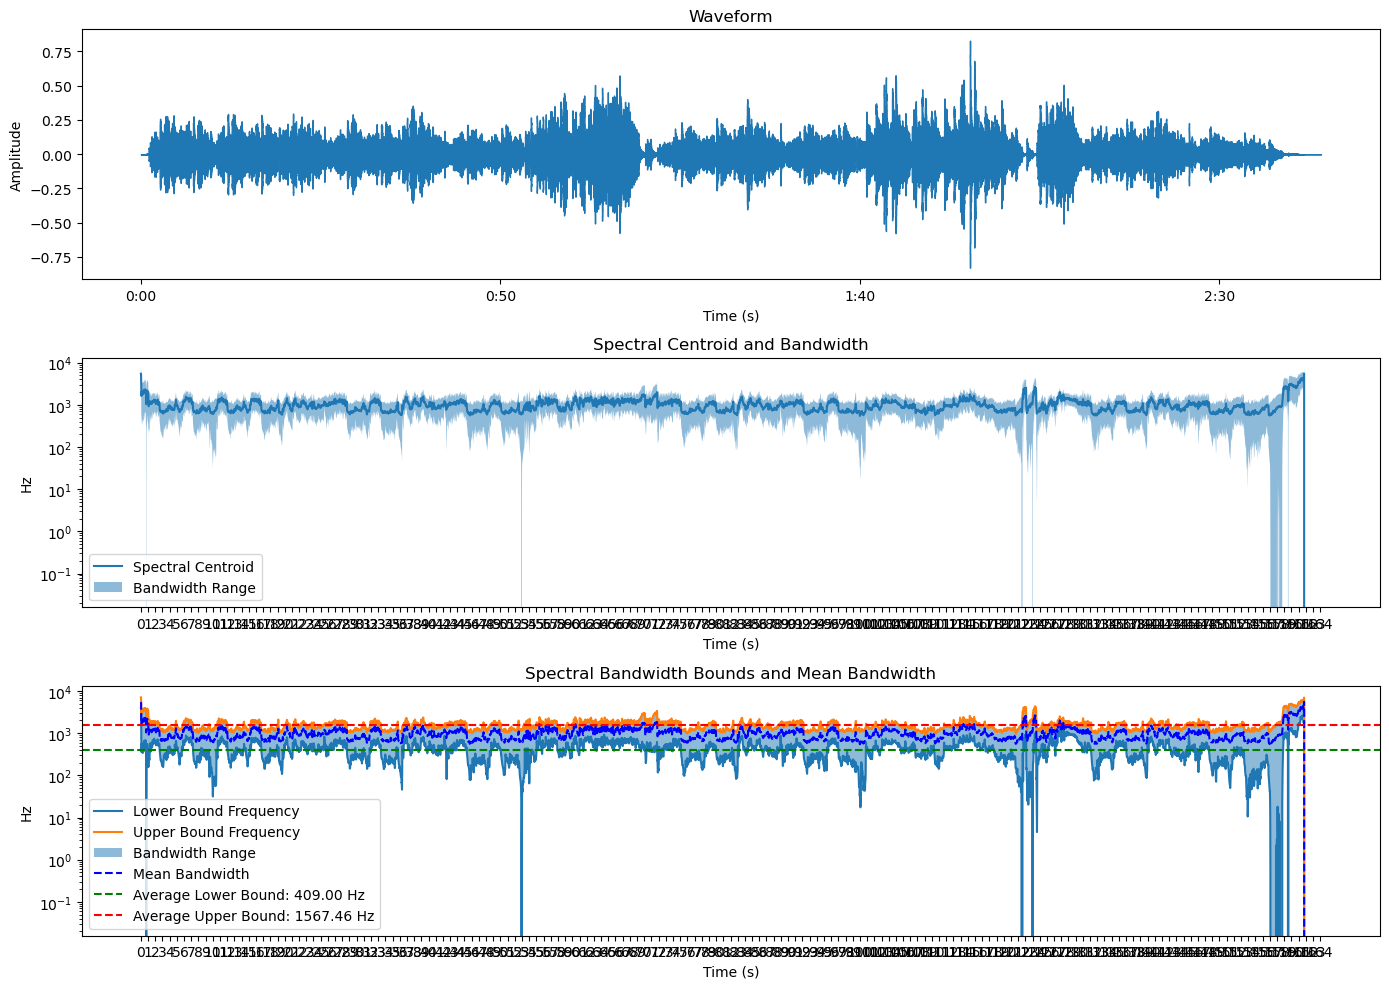

Average lower bound frequency: 409.00 Hz
Average upper bound frequency: 1567.46 Hz
Total Bandwidth: 1158.45 Hz


In [22]:
audio_path = 'alice.mp3'
y, sr = librosa.load(audio_path)

S = np.abs(librosa.stft(y))

centroid = librosa.feature.spectral_centroid(S=S, sr=sr)
bandwidth = librosa.feature.spectral_bandwidth(S=S, sr=sr)
lower_bound = centroid - bandwidth / 2
upper_bound = centroid + bandwidth / 2

mean_bandwidth = (lower_bound + upper_bound) / 2

times = librosa.times_like(bandwidth, sr=sr)

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.semilogy(times, centroid.T, label='Spectral Centroid')
plt.fill_between(times, lower_bound[0], upper_bound[0], alpha=0.5, label='Bandwidth Range')
plt.ylabel('Hz')
plt.xticks(np.arange(0, len(y)/sr, step=1.0))
plt.title('Spectral Centroid and Bandwidth')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(3, 1, 3)
plt.semilogy(times, lower_bound.T, label='Lower Bound Frequency')
plt.semilogy(times, upper_bound.T, label='Upper Bound Frequency')
plt.fill_between(times, lower_bound[0], upper_bound[0], alpha=0.5, label='Bandwidth Range')
plt.semilogy(times, mean_bandwidth.T, label='Mean Bandwidth', color='b', linestyle='--')
plt.ylabel('Hz')
plt.xticks(np.arange(0, len(y)/sr, step=1.0))
plt.title('Spectral Bandwidth Bounds and Mean Bandwidth')
plt.xlabel('Time (s)')
plt.legend()

average_lower_bound = np.mean(lower_bound)
average_upper_bound = np.mean(upper_bound)
plt.axhline(average_lower_bound, color='g', linestyle='--', label=f'Average Lower Bound: {average_lower_bound:.2f} Hz')
plt.axhline(average_upper_bound, color='r', linestyle='--', label=f'Average Upper Bound: {average_upper_bound:.2f} Hz')

plt.tight_layout()
plt.legend()
plt.show()

print(f'Average lower bound frequency: {average_lower_bound:.2f} Hz')
print(f'Average upper bound frequency: {average_upper_bound:.2f} Hz')
print(f'Total Bandwidth: {average_upper_bound - average_lower_bound:.2f} Hz')
